# **Prediksi Dini Diabetes Berdasarkan Data Klinis dan Demografis**

Kelompok 8


1.   Marshanda Claudia Iswahyono (23031554014)
2.   Thea Bayu Revalina (23031554035)
3.   Hannia Harry Putri (23031554077)
4.   Bintang Prananda Putra (23031554131)

[Dataset Prediksi Diabetes](https://www.kaggle.com/datasets/ayberkural/diabetes-prediction-dataset)



# Load dataset

In [ ]:
import pandas as pd

dataset = 'diabetes.csv'
df = pd.read_csv(dataset)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Data description

In [ ]:
df.shape

(768, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df.Outcome.value_counts()

,count
Outcome,
0,500
1,268


In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

# Cleaning Data

In [ ]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
df.duplicated().sum()

np.int64(0)

# EDA

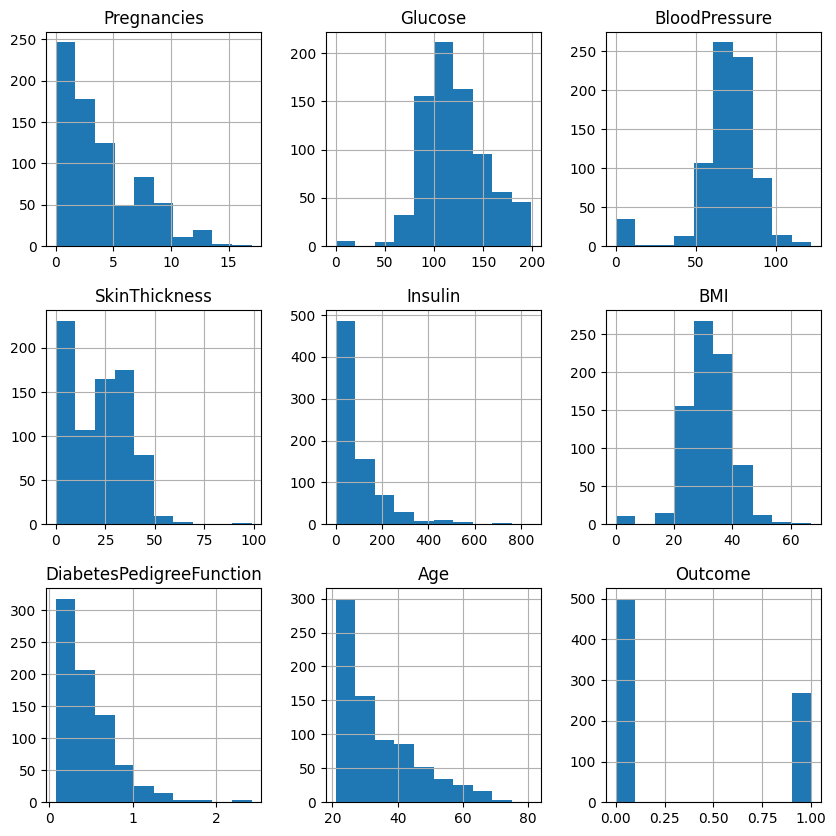

In [ ]:
df.hist(figsize=(10,10))
plt.show()

<ipython-input-34-92ba9cb36635>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Outcome", data=df, palette="Set2")


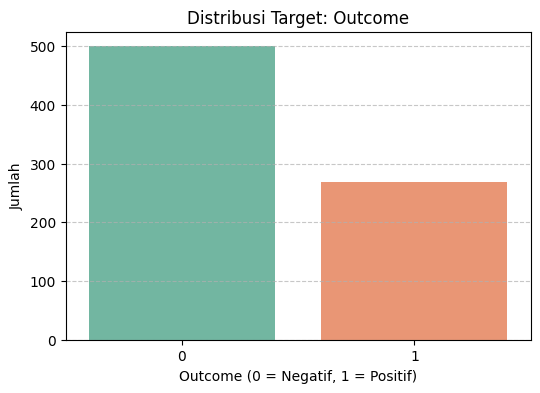

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.countplot(x="Outcome", data=df, palette="Set2")
plt.title("Distribusi Target: Outcome")
plt.xlabel("Outcome (0 = Negatif, 1 = Positif)")
plt.ylabel("Jumlah")
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()

Tidak dilakukan penanganan karena data tidak termasuk data yang inbalance (perbandingan data masih 1:2)

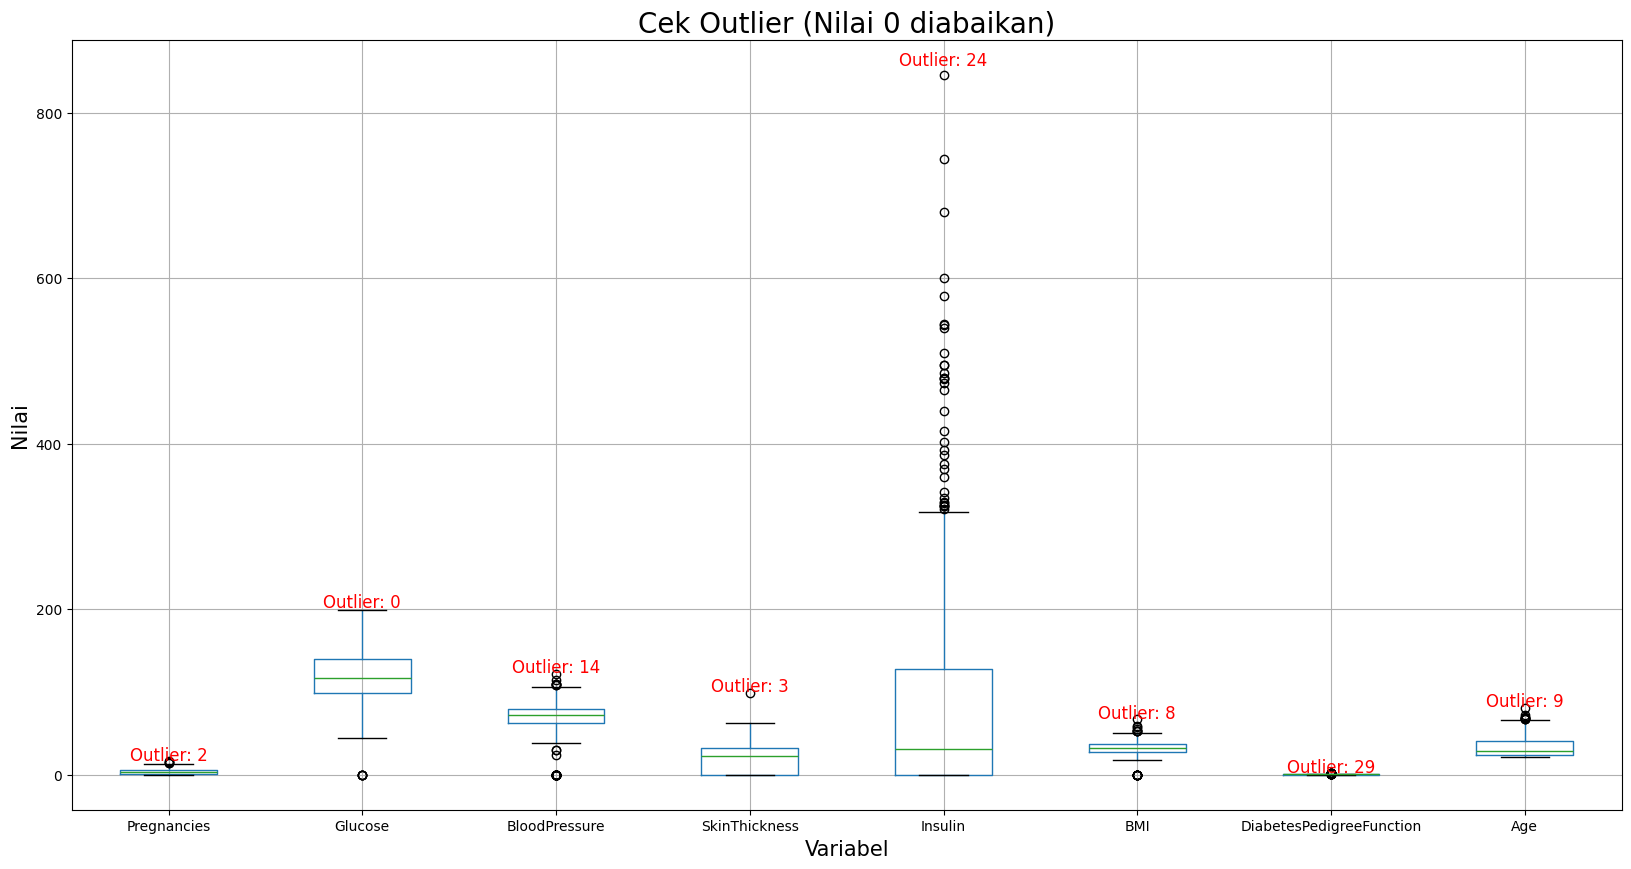

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
        'BMI', 'DiabetesPedigreeFunction', 'Age']

plt.figure(figsize=(20, 10))
df[cols].boxplot()
plt.title('Cek Outlier (Nilai 0 diabaikan)', fontsize=20)
plt.xlabel('Variabel', fontsize=15)
plt.ylabel('Nilai', fontsize=15)

for i, col in enumerate(cols, start=1):
    data_non_zero = df[col][df[col] != 0]
    Q1 = data_non_zero.quantile(0.25)
    Q3 = data_non_zero.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data_non_zero[(data_non_zero < lower_bound) | (data_non_zero > upper_bound)]
    count_outliers = outliers.shape[0]

    plt.text(i, df[col].max() + df[col].std()/10,
             f'Outlier: {count_outliers}',
             ha='center', fontsize=12, color='red')

plt.show()


In [ ]:
def outlier_iqr(data):
    outliers = []
    data_non_zero = data[data != 0]
    q1 = data_non_zero.quantile(0.25)
    q3 = data_non_zero.quantile(0.75)
    iqr = q3 - q1
    batas_bawah = q1 - 1.5 * iqr
    batas_atas = q3 + 1.5 * iqr
    for i in data_non_zero:
        if i < batas_bawah or i > batas_atas:
            outliers.append(i)
    return outliers

data_outlier = {}
total_outlier = 0

for col in cols:
    data_outlier[col] = outlier_iqr(df[col])
    jumlah_outlier = len(data_outlier[col])
    total_outlier += jumlah_outlier
    print(f'Outlier ({col}) : {jumlah_outlier} outlier → nilai: {data_outlier[col]}')

print(f'\nTotal jumlah data yang merupakan outlier (semua kolom): {total_outlier}')


Outlier (Pregnancies) : 2 outlier → nilai: [15, 17]
Outlier (Glucose) : 0 outlier → nilai: []
Outlier (BloodPressure) : 14 outlier → nilai: [30, 110, 108, 122, 30, 110, 108, 110, 24, 38, 106, 106, 106, 114]
Outlier (SkinThickness) : 3 outlier → nilai: [60, 63, 99]
Outlier (Insulin) : 24 outlier → nilai: [543, 846, 495, 485, 495, 478, 744, 370, 680, 402, 375, 545, 465, 415, 579, 474, 480, 600, 440, 540, 480, 387, 392, 510]
Outlier (BMI) : 8 outlier → nilai: [53.2, 55.0, 67.1, 52.3, 52.3, 52.9, 59.4, 57.3]
Outlier (DiabetesPedigreeFunction) : 29 outlier → nilai: [2.288, 1.441, 1.39, 1.893, 1.781, 1.222, 1.4, 1.321, 1.224, 2.329, 1.318, 1.213, 1.353, 1.224, 1.391, 1.476, 2.137, 1.731, 1.268, 1.6, 2.42, 1.251, 1.699, 1.258, 1.282, 1.698, 1.461, 1.292, 1.394]
Outlier (Age) : 9 outlier → nilai: [69, 67, 72, 81, 67, 67, 70, 68, 69]

Total jumlah data yang merupakan outlier (semua kolom): 89


Pregnancies(berapa kali jumlah kehamilan) masih masuk akal bila terjadi 15-17 kali dengan adanya kemungkinan keguguran.


BloodPressure(tekanan darah) normal sekitar 90-120, lebih dari 120 berarti hipertensi dan dibawah dari 90 berarti hipotensi


SkinThickness(ketebalan lipatan kulit) normal sekitar 15-25 mm. lebih dari 60 normal bagi orang dewasa dengan kemungkinan obesitas


Insulin 2-25 ml namun bisa lebih dari itu apabila mendapat suntikan insulin dengan prediksi orang tersebut terkenal diabetes


BMI(indeks masa tubuh) normalnya 18,5-24,9 kg namun ada orang yang memiliki lebih dari itu dengan kemungkinan obesitas


DiabetesPedigreeFuction(Faktor keturunan diabetes) 0.08-2.42 jadi masih mungkin


Age(umur) dengan diatas 60 tahun masih mungkin

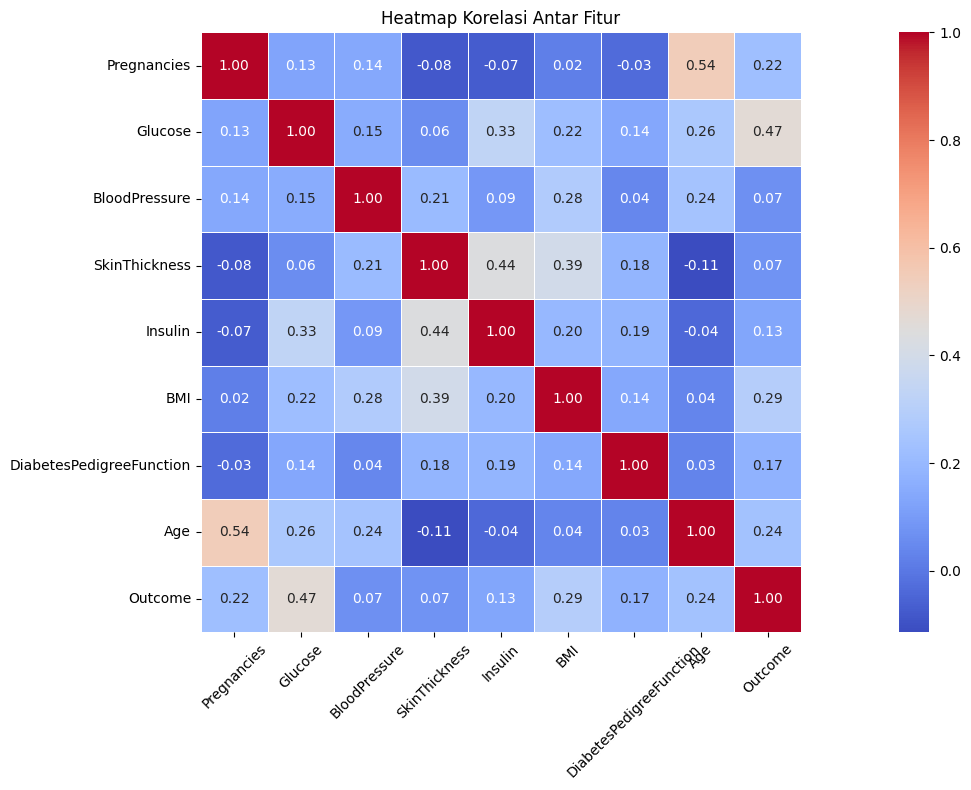

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(20, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, square=True)
plt.title("Heatmap Korelasi Antar Fitur")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Menurut hasil grafik heatmap diatas yang memiliki hubungan korelasi tertinggi dengan outcome yaitu glucose(0.47), BMI(0.29) dan Age(0.24)

# Preparation Data

In [ ]:
X = df.drop(columns='Outcome').values
y = df['Outcome'].values

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)

Menggunakan perbandingan train & test 70:30 dikarenakan saat melakukan trial dan error hasil paling maksimal didapat dengan train dan test tersebut

# Model linier

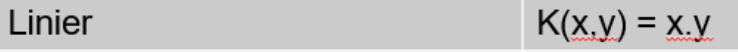

In [ ]:
class SVM:
    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.w = np.zeros(n_features)
        self.b = 0
        y_ = np.where(y <= 0, -1, 1)

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(x_i, y_[idx]))
                    self.b -= self.lr * y_[idx]

    def predict(self, X):
        return np.where(np.dot(X, self.w) - self.b >= 0, 1, 0)

    def accuracy(self, X, y):
        predictions = self.predict(X)
        return np.mean(predictions == y)

In [ ]:
svm = SVM(learning_rate=0.001, lambda_param=0.01, n_iters=1000)
svm.fit(X_train, y_train)

train_acc = svm.accuracy(X_train, y_train)
test_acc = svm.accuracy(X_test, y_test)

print(f"Akurasi Training: {train_acc:.4f}")
print(f"Akurasi Testing:  {test_acc:.4f}")

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_svm(X, y, svm, feature1, feature2, feature_names):
    plt.figure(figsize=(8, 6))
    plt.scatter(X[y == 0][:, feature1], X[y == 0][:, feature2], color='red', label='Tidak Diabetes (0)')
    plt.scatter(X[y == 1][:, feature1], X[y == 1][:, feature2], color='blue', label='Diabetes (1)')

    x_min, x_max = X[:, feature1].min() - 0.1, X[:, feature1].max() + 0.1
    xx = np.linspace(x_min, x_max, 100)
    w1, w2 = svm.w[feature1], svm.w[feature2]
    b = svm.b
    yy = (-w1 * xx + b) / (w2 + 1e-10)
    plt.plot(xx, yy, 'k-', label='Hyperplane')

    margin1 = (-w1 * xx + b + 1) / (w2 + 1e-10)
    margin2 = (-w1 * xx + b - 1) / (w2 + 1e-10)
    plt.plot(xx, margin1, 'k--')
    plt.plot(xx, margin2, 'k--')

    plt.xlabel(feature_names[feature1])
    plt.ylabel(feature_names[feature2])
    plt.title('SVM Linear: Hyperplane dan Margin')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig('svm_diabetes_manual.png')
    plt.show()

plot_svm(X_train, y_train, svm, feature1=1, feature2=5, feature_names=features)

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

def plot_svm_3d(X, y, svm, feature1, feature2, feature3, feature_names):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    ax.scatter(X[y == 0][:, feature1], X[y == 0][:, feature2], X[y == 0][:, feature3],
               color='red', label='Tidak Diabetes (0)', s=50)
    ax.scatter(X[y == 1][:, feature1], X[y == 1][:, feature2], X[y == 1][:, feature3],
               color='blue', label='Diabetes (1)', s=50)

    x_min, x_max = X[:, feature1].min() - 0.1, X[:, feature1].max() + 0.1
    y_min, y_max = X[:, feature2].min() - 0.1, X[:, feature2].max() + 0.1

    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 50), np.linspace(y_min, y_max, 50))
    w1, w2, w3 = svm.w[feature1], svm.w[feature2], svm.w[feature3]
    b = svm.b

    zz = (-w1 * xx - w2 * yy - b) / (w3 + 1e-10)

    ax.plot_surface(xx, yy, zz, color='gray', alpha=0.5, label='Hyperplane')

    zz_margin1 = (-w1 * xx - w2 * yy - b + 1) / (w3 + 1e-10)
    zz_margin2 = (-w1 * xx - w2 * yy - b - 1) / (w3 + 1e-10)
    ax.plot_surface(xx, yy, zz_margin1, color='gray', alpha=0.2)
    ax.plot_surface(xx, yy, zz_margin2, color='gray', alpha=0.2)

    ax.set_xlabel(feature_names[feature1])
    ax.set_ylabel(feature_names[feature2])
    ax.set_zlabel(feature_names[feature3])
    ax.set_title('SVM Linear 3D: Hyperplane dan Margin')

    ax.legend()

    plt.tight_layout()
    plt.savefig('svm_diabetes_3d.png')
    plt.show()

plot_svm_3d(X_train, y_train, svm, feature1=1, feature2=5, feature3=7, feature_names=features)

# Model RBF

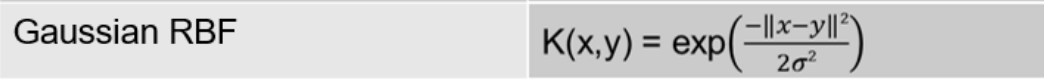

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def rbf_kernel(x1, x2, gamma):
    return np.exp(-gamma * np.linalg.norm(x1 - x2) ** 2)

class SVM_RBF:
    def __init__(self, C=0.3, gamma=0.29, lr=0.0005, n_iters=2100):
        self.C = C
        self.gamma = gamma
        self.lr = lr
        self.n_iters = n_iters

    def fit(self, X, y):
        self.X = X
        self.y = np.where(y <= 0, -1, 1)
        n_samples = X.shape[0]
        self.alpha = np.zeros(n_samples)
        self.b = 0

        self.K = np.zeros((n_samples, n_samples))
        for i in range(n_samples):
            for j in range(n_samples):
                self.K[i, j] = rbf_kernel(X[i], X[j], self.gamma)

        for _ in range(self.n_iters):
            for i in range(n_samples):
                condition = np.sum(self.alpha * self.y * self.K[:, i]) + self.b
                if self.y[i] * condition < 1:
                    self.alpha[i] += self.lr * (1 - self.y[i] * condition)
                else:
                    self.alpha[i] -= self.lr * self.alpha[i] * self.C

    def project(self, X):
        y_pred = np.zeros(X.shape[0])
        for i in range(X.shape[0]):
            s = 0
            for alpha_i, y_i, x_i in zip(self.alpha, self.y, self.X):
                if alpha_i > 1e-5:
                    s += alpha_i * y_i * rbf_kernel(X[i], x_i, self.gamma)
            y_pred[i] = s + self.b
        return y_pred

    def predict(self, X):
        return np.where(self.project(X) >= 0, 1, 0)

    def accuracy(self, X, y):
        pred = self.predict(X)
        return np.mean(pred == y)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def rbf_kernel(x1, x2, gamma):
    return np.exp(-gamma * np.linalg.norm(x1 - x2) /2*sigma)

class SVM_RBF:
    def __init__(self, C=0.3, gamma=0.29, lr=0.0005, n_iters=2100):
        self.C = C
        self.gamma = gamma
        self.lr = lr
        self.n_iters = n_iters

    def fit(self, X, y):
        self.X = X
        self.y = np.where(y <= 0, -1, 1)
        n_samples = X.shape[0]
        self.alpha = np.zeros(n_samples)
        self.b = 0

        self.K = np.zeros((n_samples, n_samples))
        for i in range(n_samples):
            for j in range(n_samples):
                self.K[i, j] = rbf_kernel(X[i], X[j], self.gamma)

        for _ in range(self.n_iters):
            for i in range(n_samples):
                condition = np.sum(self.alpha * self.y * self.K[:, i]) + self.b
                if self.y[i] * condition < 1:
                    self.alpha[i] += self.lr * (1 - self.y[i] * condition)
                else:
                    self.alpha[i] -= self.lr * self.alpha[i] * self.C

    def project(self, X):
        y_pred = np.zeros(X.shape[0])
        for i in range(X.shape[0]):
            s = 0
            for alpha_i, y_i, x_i in zip(self.alpha, self.y, self.X):
                if alpha_i > 1e-5:
                    s += alpha_i * y_i * rbf_kernel(X[i], x_i, self.gamma)
            y_pred[i] = s + self.b
        return y_pred

    def predict(self, X):
        return np.where(self.project(X) >= 0, 1, 0)

    def accuracy(self, X, y):
        pred = self.predict(X)
        return np.mean(pred == y)


In [ ]:
def plot_svm_rbf(X, y, svm, feature1, feature2, feature_names):
    plt.figure(figsize=(8, 6))
    plt.scatter(X[y == 0][:, feature1], X[y == 0][:, feature2], color='red', label='Tidak Diabetes (0)')
    plt.scatter(X[y == 1][:, feature1], X[y == 1][:, feature2], color='blue', label='Diabetes (1)')

    x_min, x_max = X[:, feature1].min() - 1, X[:, feature1].max() + 1
    y_min, y_max = X[:, feature2].min() - 1, X[:, feature2].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
    grid = np.c_[xx.ravel(), yy.ravel()]

    X_test_grid = np.zeros((grid.shape[0], X.shape[1]))
    X_test_grid[:, feature1] = grid[:, 0]
    X_test_grid[:, feature2] = grid[:, 1]

    Z = svm.project(X_test_grid)
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, levels=[-float("inf"), 0, float("inf")], colors=['#FFAAAA', '#AAAAFF'], alpha=0.3)
    plt.title("SVM dengan RBF Kernel")
    plt.xlabel(feature_names[feature1])
    plt.ylabel(feature_names[feature2])
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig('svm_rbf_diabetes.png')
    plt.show()

plot_svm_rbf(X_train, y_train, svm_rbf, feature1=1, feature2=5, feature_names=features)

In [ ]:
svm_rbf = SVM_RBF(C=0.3, gamma=0.29, lr=0.0005, n_iters=2100)
svm_rbf.fit(X_train, y_train)
print("Akurasi Train:", svm_rbf.accuracy(X_train, y_train))
print("Akurasi Test :", svm_rbf.accuracy(X_test, y_test))